In [30]:
import numpy as np
import matplotlib.pyplot as plt
from cvxopt import matrix
from sklearn.model_selection import train_test_split


(2000, 2)


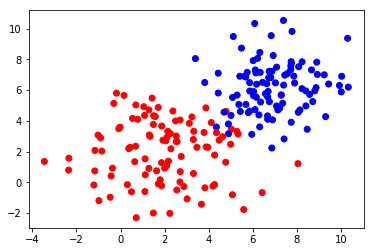

In [31]:
X1=2*np.random.randn(1000,2)+np.array([2,2])
X2=1.5*np.random.randn(1000,2)+np.array([7,6])
data=np.concatenate((X1,X2),axis=0).reshape((2000,2))
print(data.shape)
plt.show()
Y=np.concatenate((np.ones(1000),(-1*np.ones(1000)))).reshape((2000,1))
X_train, X_test, y_train, y_test = train_test_split( data, Y, test_size=0.9, random_state=42)
c=[]
for item in y_train:
    if item==1:
        c.append('red')
    else:
        c.append('blue')
plt.scatter(X_train.T[0,:],X_train.T[1,:],c=c)
plt.show()

In [32]:
def Gauss_kernel(x1,x2,sigma):
    dist =np.abs(x1-x2)
    return np.exp(-1*np.matmul(dist.T,dist)/sigma)


In [33]:
def Gram_matrix(X1,X2,sigma):
    I,J=X1.shape
    I,K=X2.shape
    GM=np.zeros((J,K))
    for j in range(J):
        for k in range(K):
            GM[j,k]= Gauss_kernel(X1[:,j],X2[:,k],sigma)
    return GM     

In [34]:

G=Gram_matrix(X_train.T,X_train.T,10)
X=X_train.T
Y=y_train
m,n= X.shape
C=1
A1=np.zeros((n,n))
for i in range(n):
    for j in range(n):
        A1[i,j]=Y[i]*Y[j]*G[i,j]

Aineq=matrix(-1*np.identity(n))
bineq=matrix(np.zeros((n,1)))

In [35]:
f=-1*np.ones((n,1))
Aeq=matrix(Y.T,tc='d')
beq=matrix(np.array([[0]]),tc="d")



In [83]:
from cvxopt import solvers
sol = solvers.qp(A1,matrix(f,tc='d'),Aineq,bineq,Aeq,beq)

ValueError: use of function valued P, G, A requires a user-provided kktsolver

In [37]:
alpha=np.array(sol['x'])
w=np.zeros((1,2))
for i in range(n):
    w=w+alpha[i]*Y[i]*X[:,i]

w=w.T

In [81]:
index_alpha=[]
for i in range(len(alpha)):
    if alpha[i][0]>.5 and C>alpha[i][0]:
        index_alpha.append(i)

sum_X=(X[:,index_alpha].sum(1)).reshape((2,1))
b=0


alpha>5

array([[False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [

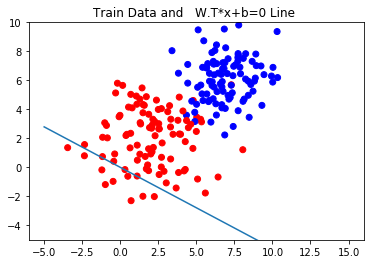

In [44]:
x1=np.linspace(-5,15,200)
x2=-(w[0]/w[1])*x1-b/(w[1])
plt.scatter(X[0,:],X[1,:],c=c)
plt.plot(x1,x2,)
plt.ylim([-5, 10])
plt.title("Train Data and   W.T*x+b=0 Line ")
plt.show()

In [45]:
G_test=Gram_matrix(X_train.T,X_test.T,10)
np.matmul((Y*alpha).T,G_test)


array([[  -6.40678734,  803.30569077, -426.59473546, ..., -108.67773658,
         715.18967715, -639.71666638]])

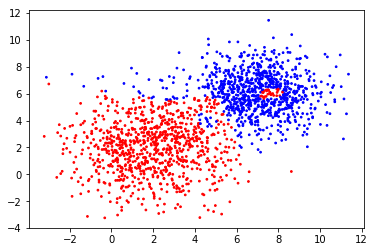

In [46]:
y_predicted=np.sign(np.matmul((Y*alpha).T,G_test))
color=[]
for item in y_predicted[0]:
       # print(item)
        if item==1:
            color.append('red')
        else:
            color.append('blue')
    
plt.scatter(X_test[:,0],X_test[:,1],c=color,s=3)
plt.show()

In [47]:
k_error=0
for i in range(1800):
    
    if y_predicted[0][i]!=y_test[i][0]:
        k_error+=1

error_percent=k_error/18
print("Error in percent: ",error_percent,'%')

Error in percent:  6.666666666666667 %
